In [61]:
import pandas as pd
import numpy as np

In [62]:
diamonds=pd.read_csv("./input/data.csv")
diamonds.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,2.26,Ideal,G,SI2,61.9,57.0,8.44,8.36,5.20,12831
1,2.43,Very Good,H,SI2,63.2,57.0,8.56,8.50,5.39,16170
2,0.80,Premium,F,SI2,61.0,57.0,6.03,6.01,3.67,2797
3,0.40,Ideal,F,I1,63.3,60.0,4.68,4.64,2.95,630
4,0.31,Ideal,G,VS2,61.6,55.0,4.39,4.37,2.70,698


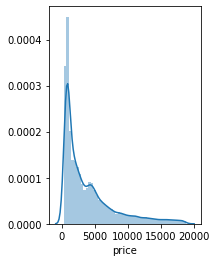

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplot(1,2,1)
sns.distplot(diamonds['price'])

In [64]:
print(diamonds.shape)
diamonds=diamonds[(diamonds.x!=0) & (diamonds.y!=0) & (diamonds.z!=0)]
diamonds

(40455, 10)


,carat,cut,color,clarity,depth,table,x,y,z,price
0,2.26,Ideal,G,SI2,61.9,57.0,8.44,8.36,5.20,12831
1,2.43,Very Good,H,SI2,63.2,57.0,8.56,8.50,5.39,16170
2,0.80,Premium,F,SI2,61.0,57.0,6.03,6.01,3.67,2797
3,0.40,Ideal,F,I1,63.3,60.0,4.68,4.64,2.95,630
4,0.31,Ideal,G,VS2,61.6,55.0,4.39,4.37,2.70,698
...,...,...,...,...,...,...,...,...,...,...
40450,1.11,Premium,H,SI1,62.8,61.0,6.63,6.56,4.14,5315
40451,0.73,Ideal,F,VS2,62.6,56.0,5.77,5.74,3.60,2762
40452,1.26,Very Good,I,VS1,59.2,60.0,7.09,7.02,4.18,6855
40453,0.72,Ideal,G,SI2,61.4,56.0,5.76,5.83,3.56,2297


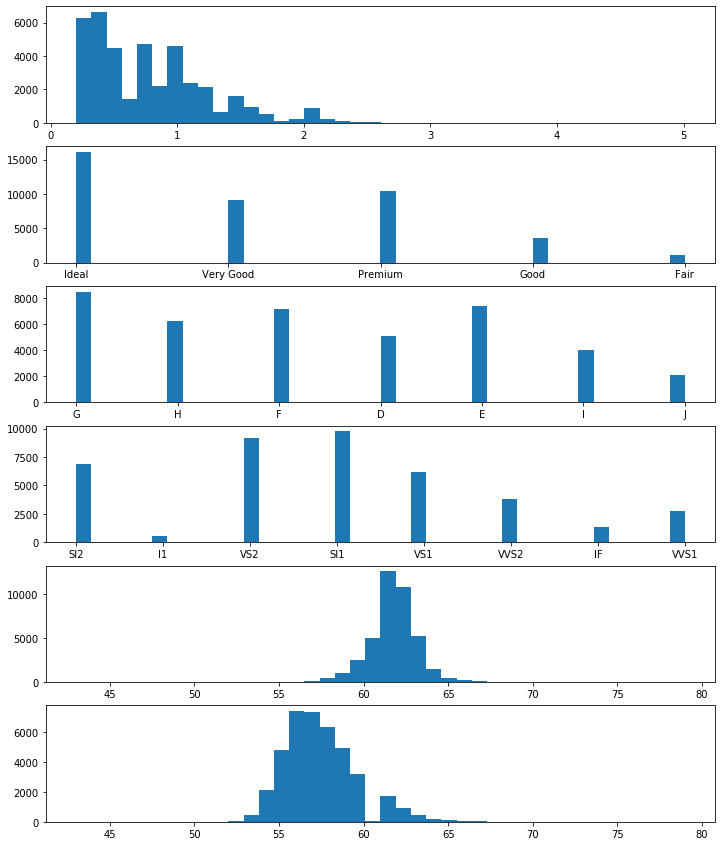

In [65]:
import matplotlib.pyplot as plt
cols=["carat","cut","color","clarity","depth","table"]
fig, axes = plt.subplots(6, figsize=(12,15))
for k,v in enumerate(cols):
    plt.sca(axes[k])
    plt.hist(diamonds[v],bins=40) 

In [66]:
diamonds.drop(columns=['y','x','z'],inplace=True)
cols_norm=['carat',"depth","table"]
for c in cols_norm:
    mean=np.mean(diamonds[c])
    std=np.std(diamonds[c])
    diamonds[c]=(diamonds[c]-mean)/std
#diamonds['price']=np.log(diamonds.price)

In [67]:
def color_grouping(x):
    for k,v in changes.items():
        if x==k:
            x=v
            return x
    return x

In [68]:
changes={"D":1,"E":2,"F":3,"G":4,"H":5,"I":6,"J":6}
diamonds.color=diamonds.color.apply(color_grouping)

changes={"I1":8,"SI2":7, "SI1":6, "VS2":5, "VS1":4, "VVS2":3, "VVS1":2, "IF":1}
diamonds.clarity=diamonds.clarity.apply(color_grouping)

changes={'Good':"Good/Fair",'Fair':"Good/Fair"}
diamonds.cut=diamonds.cut.apply(color_grouping)

In [69]:
diamonds.cut.value_counts()

Ideal        16136
Premium      10370
Very Good     9100
Good/Fair     4834
Name: cut, dtype: int64

In [70]:
dummies=diamonds[['cut']]
d_dum=pd.get_dummies(dummies)
diam=diamonds.join(d_dum)
diam

,carat,cut,color,clarity,depth,table,price,cut_Good/Fair,cut_Ideal,cut_Premium,cut_Very Good
0,3.083270,Ideal,4,7,0.106100,-0.205634,12831,0,1,0,0
1,3.441825,Very Good,5,7,1.013920,-0.205634,16170,0,0,0,1
2,0.003922,Premium,3,7,-0.522390,-0.205634,2797,0,0,1,0
3,-0.839736,Ideal,3,8,1.083752,1.139295,630,0,1,0,0
4,-1.029559,Ideal,4,5,-0.103396,-1.102253,698,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
40450,0.657756,Premium,5,6,0.734591,1.587604,5315,0,0,1,0
40451,-0.143718,Ideal,3,5,0.594926,-0.653943,2762,0,1,0,0
40452,0.974127,Very Good,6,4,-1.779371,1.139295,6855,0,0,0,1
40453,-0.164810,Ideal,4,7,-0.243061,-0.653943,2297,0,1,0,0


In [71]:
diam.drop(columns=['cut'],inplace=True)

In [72]:
car_50=diamonds.describe()['carat'][5]

In [73]:
d1_menor=diam[diam['carat']<car_50]
d1_mayor=diam[diam['carat']>=car_50]

In [74]:
y_menor=d1_menor['price']
c=list(diam.columns)
c.remove('price')
X_menor=d1_menor[c]
y_mayor=d1_mayor['price']
X_mayor=d1_mayor[c]

In [75]:
print(X_menor.shape,X_mayor.shape)

(18859, 9) (21581, 9)


In [76]:
from sklearn.model_selection import train_test_split

X_train_mayor, X_test_mayor, y_train_mayor, y_test_mayor = train_test_split(X_mayor,y_mayor, test_size=0.2)
X_train_menor, X_test_menor, y_train_menor, y_test_menor = train_test_split(X_menor,y_menor, test_size=0.2)


In [77]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=2, shuffle=True, random_state=11)

In [78]:
from sklearn.metrics import mean_squared_error
from math import sqrt
#print(sqrt(mean_squared_error(y_pred_test_mayor, y_test_mayor)),sqrt(mean_squared_error(y_pred_test_menor, y_test_menor)))

## MAYOR

In [79]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
models_mayor = {
    "Linear": LinearSVR(),
    "neigbor":KNeighborsRegressor(),
    "boosting": GradientBoostingRegressor(),
    "histboosting": HistGradientBoostingRegressor(),
    "histboosting2": HistGradientBoostingRegressor(learning_rate=0.2),
    "forest220": RandomForestRegressor(n_estimators=220),
    "forest230": RandomForestRegressor(n_estimators=230),
    "forest250": RandomForestRegressor(n_estimators=250),
    "forest150": RandomForestRegressor(n_estimators=150)
}

for modelName, model in models_mayor.items():
    print(f"Training model: {modelName}")
    model.fit(X_train_mayor, y_train_mayor)
    print(np.mean(cross_val_score(model, X_train_mayor, y_train_mayor, scoring='r2', cv=kf, n_jobs=2)))
    


Training model: Linear
0.5608297416578121
Training model: neigbor
0.8781431378102631
Training model: boosting
0.9546754278457584
Training model: histboosting
0.9607882875715956
Training model: histboosting2
0.9595576429360617
Training model: forest220
0.9576651719261264
Training model: forest230
0.9576603780341647
Training model: forest250
0.9576249244342807
Training model: forest150
0.9574719797881683


In [80]:
d = {modelName:model.predict(X_test_mayor) for modelName, model in models_mayor.items()}

df = pd.DataFrame(d)
df["gt"] = y_test_mayor.reset_index(drop=True)
df

,Linear,neigbor,boosting,histboosting,histboosting2,forest220,forest230,forest250,forest150,gt
0,2434.236436,6378.2,4274.078716,3927.349107,3759.166603,3859.575758,3798.918986,3872.430000,3953.682222,3907
1,11758.468756,7261.4,6484.781856,6025.590104,6305.757855,6164.004545,6186.682609,6134.256000,6143.706667,8064
2,4543.588856,5191.8,4850.052591,5015.327217,5048.229066,5428.872727,5364.704348,5390.056000,5403.780000,5045
3,10396.960512,11161.8,12674.518867,12433.749222,12234.568940,10968.501840,11137.910870,11068.568667,11125.944444,12361
4,10503.261109,8822.4,10655.252806,9639.884093,9397.188651,9250.874545,9304.376812,9238.906800,9382.320000,9704
...,...,...,...,...,...,...,...,...,...,...
4312,2355.068058,2696.2,2466.396032,2279.040152,2381.301526,2421.502273,2430.474638,2443.792533,2424.148889,1844
4313,1998.195181,2512.2,1754.804080,2079.730972,2034.602124,2005.881818,2021.539130,2005.076000,2010.860000,1792
4314,5868.904888,6636.6,7935.302971,7497.683023,7540.718338,7165.427273,7208.969565,7333.157600,7324.746667,7064
4315,4463.354619,10043.0,9720.005119,10238.352453,10413.370810,10092.496818,10182.650435,10029.757733,10068.390000,10113


In [81]:
for c in df.columns:  
    print(sqrt(mean_squared_error(df[c], df['gt'])))


2212.5695127014956
1256.5039013736668
830.2861056757638
746.5161834882593
757.0700124934799
780.9011703398411
779.4711725416907
779.3697211930595
779.4243841416223
0.0


## MENOR

In [104]:
models_menor = {
    "Linear": LinearSVR(),
    "neigbor":KNeighborsRegressor(),
    "boosting": GradientBoostingRegressor(),
    "histboosting": HistGradientBoostingRegressor(),
    "histboosting2": HistGradientBoostingRegressor(learning_rate=0.09),
    "forest220": RandomForestRegressor(n_estimators=220),
    "forest230": RandomForestRegressor(n_estimators=230),
    "forest250": RandomForestRegressor(n_estimators=250),
    "forest150": RandomForestRegressor(n_estimators=150)
}

for modelName, model in models_menor.items():
    print(f"Training model: {modelName}")
    model.fit(X_train_menor, y_train_menor)
    print(np.mean(cross_val_score(model, X_train_menor, y_train_menor, scoring='r2', cv=kf, n_jobs=2)))
    
 

Training model: Linear
0.06299369977757602
Training model: neigbor
0.5943694931677836
Training model: boosting
0.9501620734404888
Training model: histboosting
0.9539734908082979
Training model: histboosting2
0.9536656495767941
Training model: forest220
0.9429301169228513
Training model: forest230
0.943088970392626
Training model: forest250
0.9430666387483695
Training model: forest150
0.9430464047333191


In [105]:
d = {modelName:model.predict(X_test_menor) for modelName, model in models_menor.items()}

df_menor = pd.DataFrame(d)
df_menor["gt"] = y_test_menor.reset_index(drop=True)
df_menor

,Linear,neigbor,boosting,histboosting,histboosting2,forest220,forest230,forest250,forest150,gt
0,1143.149316,1355.0,1623.863393,1640.106177,1650.243708,1512.059545,1502.860870,1504.530000,1502.833333,1654
1,1124.914481,1047.0,1720.556884,1658.451686,1712.396876,1798.147273,1804.449130,1791.508000,1781.323111,1648
2,660.033323,614.0,508.579881,479.737914,470.010817,468.045455,470.555797,476.816000,470.626667,490
3,1257.485143,865.8,2035.337561,1927.531085,1931.520250,1855.240909,1834.013043,1842.948000,1829.286667,1827
4,927.415634,841.0,919.627041,908.844917,907.499228,991.278030,995.410145,992.182667,996.143333,800
...,...,...,...,...,...,...,...,...,...,...
3767,1016.752360,1850.4,1894.356623,1864.306444,1841.893084,1871.572348,1866.442391,1866.830667,1867.787889,1833
3768,864.081851,1053.8,964.166701,1018.053627,1006.062019,1056.467760,1049.675362,1051.715600,1057.604349,1000
3769,1070.683123,1148.2,1418.942874,1488.823906,1499.437281,1538.730909,1535.842391,1525.676667,1531.785556,1580
3770,945.153634,1297.6,1070.351579,1083.649773,1093.573031,1107.721894,1108.063261,1089.962000,1095.786111,1315


In [106]:
for c in df_menor.columns:
    print(sqrt(mean_squared_error(df_menor[c], df_menor['gt'])))

431.0078989465924
306.87076880777425
132.03760808400952
126.38590238775684
126.68406840346479
136.1766757584723
136.19694250684552
136.2396411346892
135.92433785117817
0.0


# TEST

In [126]:
d_test=pd.read_csv("./input/test.csv")

In [127]:
d_test.drop(columns=['y','x','z'],inplace=True)
cols_norm=['carat',"depth","table"]
for c in cols_norm:
    mean=np.mean(d_test[c])
    std=np.std(d_test[c])
    d_test[c]=(d_test[c]-mean)/std

In [128]:
changes={"D":1,"E":2,"F":3,"G":4,"H":5,"I":6,"J":6}
d_test.color=d_test.color.apply(color_grouping)

changes={"I1":8,"SI2":7, "SI1":6, "VS2":5, "VS1":4, "VVS2":3, "VVS1":2, "IF":1}
d_test.clarity=d_test.clarity.apply(color_grouping)

changes={'Good':"Good/Fair",'Fair':"Good/Fair"}
d_test.cut=d_test.cut.apply(color_grouping)

In [129]:
d_test.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
dtype: int64

In [130]:
dummies_test=d_test[['cut']]
dumtest=pd.get_dummies(dummies_test)
diam_test=d_test.join(dumtest)
diam_test

,id,carat,cut,color,clarity,depth,table,cut_Good/Fair,cut_Ideal,cut_Premium,cut_Very Good
0,0,-0.500241,Ideal,6,5,0.241489,-1.537773,0,1,0,0
1,1,0.535739,Ideal,4,5,0.101972,-0.646693,0,1,0,0
2,2,-0.627096,Premium,2,5,-0.177064,-0.646693,0,0,1,0
3,3,0.007178,Ideal,3,4,0.729801,-0.646693,0,1,0,0
4,4,-0.542526,Ideal,4,4,-0.246823,-0.201152,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,-0.204247,Premium,5,6,-1.921035,1.135469,0,0,1,0
13481,13481,-0.521383,Ideal,4,3,0.381007,-1.983314,0,1,0,0
13482,13482,1.571718,Ideal,4,6,-0.177064,-1.092233,0,1,0,0
13483,13483,-1.049945,Premium,4,7,0.660042,-1.092233,0,0,1,0


In [131]:
diam_test.drop(columns=['cut'],inplace=True)

In [132]:
car_50=diam_test.describe()['carat'][5]

In [133]:
test=diam_test.drop(columns=['id'])

In [134]:
test

,carat,color,clarity,depth,table,cut_Good/Fair,cut_Ideal,cut_Premium,cut_Very Good
0,-0.500241,6,5,0.241489,-1.537773,0,1,0,0
1,0.535739,4,5,0.101972,-0.646693,0,1,0,0
2,-0.627096,2,5,-0.177064,-0.646693,0,0,1,0
3,0.007178,3,4,0.729801,-0.646693,0,1,0,0
4,-0.542526,4,4,-0.246823,-0.201152,0,1,0,0
...,...,...,...,...,...,...,...,...,...
13480,-0.204247,5,6,-1.921035,1.135469,0,0,1,0
13481,-0.521383,4,3,0.381007,-1.983314,0,1,0,0
13482,1.571718,4,6,-0.177064,-1.092233,0,1,0,0
13483,-1.049945,4,7,0.660042,-1.092233,0,0,1,0


In [135]:
test_menor=test[test['carat']<car_50]
test_mayor=test[test['carat']>=car_50]

In [136]:
test_mayor

,carat,color,clarity,depth,table,cut_Good/Fair,cut_Ideal,cut_Premium,cut_Very Good
1,0.535739,4,5,0.101972,-0.646693,0,1,0,0
3,0.007178,3,4,0.729801,-0.646693,0,1,0,0
5,3.072832,2,8,-0.246823,-1.537773,0,1,0,0
9,2.755695,6,7,0.869319,-0.646693,0,1,0,0
15,-0.161962,1,5,0.729801,-0.201152,0,1,0,0
...,...,...,...,...,...,...,...,...,...
13465,0.430026,5,5,0.660042,-1.537773,1,0,0,0
13470,3.009405,5,8,5.822196,-1.092233,1,0,0,0
13471,2.544271,6,6,1.706425,1.581009,1,0,0,0
13480,-0.204247,5,6,-1.921035,1.135469,0,0,1,0


In [137]:
price_pred_mayor=models_mayor['forest220'].predict(test_mayor)
price_pred_menor=models_menor['forest220'].predict(test_menor)

In [138]:
test.shape

(13485, 9)

In [139]:
test_mayor.shape

(7163, 9)

In [140]:
test_menor.shape

(6322, 9)

In [141]:
'''import math
p_mayor=[]
for p in price_pred_mayor:
    p_mayor.append(np.round(math.exp(p),2))
p_menor=[]
for m in price_pred_menor:
    p_menor.append(np.round(math.exp(m),2))'''

'import math\np_mayor=[]\nfor p in price_pred_mayor:\n    p_mayor.append(np.round(math.exp(p),2))\np_menor=[]\nfor m in price_pred_menor:\n    p_menor.append(np.round(math.exp(m),2))'

In [142]:
df_menor=pd.DataFrame({'id':d_test[d_test['carat']<car_50]['id'],
                'price':price_pred_menor})
df_mayor=pd.DataFrame({'id':d_test[d_test['carat']>=car_50]['id'],
                      'price': price_pred_mayor})


In [143]:
res=pd.concat([df_menor,df_mayor])

In [144]:
res.to_csv("./output/res9.csv",index=False)

# Sin separar

In [145]:
y=diam['price']
c=list(diam.columns)
c.remove('price')
X=diam[c]

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


In [147]:
models = {
    "Linear": LinearSVR(),
    "neigbor":KNeighborsRegressor(),
    "boosting": GradientBoostingRegressor(),
    "histboosting": HistGradientBoostingRegressor(),
    "histboosting2": HistGradientBoostingRegressor(learning_rate=0.09),
    "histboosting3": HistGradientBoostingRegressor(learning_rate=0.2),
    "forest250": RandomForestRegressor(n_estimators=250),
    "forest220": RandomForestRegressor(n_estimators=220),
    "forest200": RandomForestRegressor(n_estimators=150)
}

for modelName, model in models.items():
    print(f"Training model: {modelName}")
    model.fit(X_train, y_train)
    print(np.mean(cross_val_score(model, X_train, y_train, scoring='r2', cv=kf, n_jobs=2)))
  

Training model: Linear
0.7570492045927876
Training model: neigbor
0.9332628595862426
Training model: boosting
0.9731623879834139
Training model: histboosting
0.9780135757261486
Training model: histboosting2
0.9781251157747151
Training model: histboosting3
0.9774970056109273
Training model: forest250
0.9761398207122459
Training model: forest220
0.9760749447647736
Training model: forest200
0.9761319133383031


In [148]:
d = {modelName:model.predict(X_test) for modelName, model in models.items()}

df_todo = pd.DataFrame(d)
df_todo["gt"] = y_test.reset_index(drop=True)
df_todo

,Linear,neigbor,boosting,histboosting,histboosting2,histboosting3,forest250,forest220,forest200,gt
0,1794.027824,893.8,1436.107100,1228.182877,1257.052765,1224.535320,1244.500000,1243.454545,1232.155556,1077
1,553.608103,917.2,845.575742,806.159152,804.579729,798.080888,903.489229,902.948128,898.246619,758
2,581.176385,640.8,377.969920,523.073377,551.044726,541.802192,568.864400,575.041667,578.774444,624
3,5339.158239,5480.6,5172.264797,5261.128496,5328.073873,5383.756407,5742.192000,5790.578788,6150.653333,5192
4,4627.774779,4854.0,5025.371233,4789.369675,4788.836037,4860.763176,4844.952000,4765.843939,4768.188333,4474
...,...,...,...,...,...,...,...,...,...,...
8083,3546.398171,4221.6,2654.581386,2717.810379,2753.892852,2682.616176,2790.980000,2808.822727,2734.126667,2585
8084,2220.410617,2557.6,2014.679810,1945.369430,1932.047955,1945.677438,1968.042000,1964.790909,1961.240000,1805
8085,2753.653902,1678.2,2066.394166,2235.184533,2163.985264,2268.456322,2046.712000,2014.063636,2048.722667,1959
8086,1017.594190,1003.0,925.413100,882.595855,876.338323,881.397311,810.264000,813.077273,812.866667,772


In [149]:
for c in df_todo.columns:
    print(sqrt(mean_squared_error(df_todo[c], df_todo['gt'])))

1750.8308677058656
923.3683570301667
652.4247133082353
593.0816275339465
591.2794860038725
593.7393629523089
580.9631309036022
580.072581662666
583.5193231383826
0.0


# Test todo junto

In [150]:
d_test=pd.read_csv("./input/test.csv")

In [151]:
d_test.drop(columns=['y','x','z'],inplace=True)
cols_norm=['carat',"depth","table"]
for c in cols_norm:
    mean=np.mean(d_test[c])
    std=np.std(d_test[c])
    d_test[c]=(d_test[c]-mean)/std

In [154]:
changes={"D":1,"E":2,"F":3,"G":4,"H":5,"I":6,"J":6}
d_test.color=d_test.color.apply(color_grouping)

changes={"I1":8,"SI2":7, "SI1":6, "VS2":5, "VS1":4, "VVS2":3, "VVS1":2, "IF":1}
d_test.clarity=d_test.clarity.apply(color_grouping)

changes={'Good':"Good/Fair",'Fair':"Good/Fair"}
d_test.cut=d_test.cut.apply(color_grouping)

In [155]:
dummies_test=d_test[['cut']]
dumtest=pd.get_dummies(dummies_test)
diam_test=d_test.join(dumtest)
diam_test

,id,carat,cut,color,clarity,depth,table,cut_Good/Fair,cut_Ideal,cut_Premium,cut_Very Good
0,0,-0.500241,Ideal,6,5,0.241489,-1.537773,0,1,0,0
1,1,0.535739,Ideal,4,5,0.101972,-0.646693,0,1,0,0
2,2,-0.627096,Premium,2,5,-0.177064,-0.646693,0,0,1,0
3,3,0.007178,Ideal,3,4,0.729801,-0.646693,0,1,0,0
4,4,-0.542526,Ideal,4,4,-0.246823,-0.201152,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,-0.204247,Premium,5,6,-1.921035,1.135469,0,0,1,0
13481,13481,-0.521383,Ideal,4,3,0.381007,-1.983314,0,1,0,0
13482,13482,1.571718,Ideal,4,6,-0.177064,-1.092233,0,1,0,0
13483,13483,-1.049945,Premium,4,7,0.660042,-1.092233,0,0,1,0


In [156]:
diam_test.drop(columns=['cut'],inplace=True)

In [157]:
test=diam_test.drop(columns=['id'])

In [158]:
test_pred=models_mayor['histboosting'].predict(test)

In [159]:
df_todo=pd.DataFrame({'id':diam_test['id'],
                'price':test_pred})

In [160]:
df_todo.to_csv("./output/res10.csv",index=False)